In [14]:
#!pip3 install multiprocess
from multiprocessing import Poo
l
import math
import numpy as np
import pandas as pd
# !pip3 install tqdm

import matplotlib.pyplot as plt
from tqdm import tqdm

ImportError: cannot import name 'Poo' from 'multiprocessing' (/usr/lib/python3.8/multiprocessing/__init__.py)

In [15]:
def arrangement_1(nleds,d):

    l=math.sqrt(nleds);

    ledcord=np.zeros((2,nleds));

    temp=0;
    for k in range(nleds):
        ledcord[0,k]=-(l-1)*d/2 +((k)%l)*d;
        if (k)%l ==0 and k != 0:
            temp=temp+1;
        ledcord[1,k]=-(l-1)*d/2 + temp*d;

    return ledcord

def E_xy_cent(ledcord,nleds,Ir_0,z,d):
    
    x=0;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;
    
def E_xy_end(ledcord,nleds,Ir_0,z,d,x_end):
    
    x=x_end;
    y=0;
    E=0;
    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));

    return E;

def plot_E_xy_full(ledcord,nleds,Ir_0,z,d):
    l=math.sqrt(nleds)
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-10, 10, 0.01)

    x,y=np.meshgrid(x, y, sparse=False, indexing='ij')

    E=np.zeros(np.size(x));

    for i in range(nleds):
        den=np.square(np.square(x-ledcord[0,i]) +np.square(y-ledcord[1,i]) +z**2);
        E= E + (z**2 * Ir_0)*(np.reciprocal(den));
        
    return E;

#     s=surface(x,y,E);
#     xlabel('x-coordinate(m)');
#     ylabel('y-coordinate(m)');
#     zlabel('Irradinace(W/m^2)');
#     s.EdgeColor = 'none';


In [16]:
nleds=49;
Ir_0 = 1;
d=0.122292;
z=0.05;
ledcord = arrangement_1(nleds,d);
x_end=0.0;
print(E_xy_end(ledcord,nleds,Ir_0,z,d,x_end))

450.9825479895467


In [90]:
nleds=121;
Ir_0 = 1;

# print(plot_E_xy_full(ledcord,nleds,Ir_0,z,d))
# E_cent=E_xy_cent(ledcord,nleds,Ir_0,z,d)
# E_half = E_cent/2
# E_99 = E_cent * 0.99
# x_half = 0
# x_99 = 0
# x_half_flag = False
# x_99_flag = False

final_list = []


def ratio(d):
# for d in tqdm(np.linspace(0.01,0.2,10)):
    ledcord = arrangement_1(nleds,d)
    for z in np.linspace(0.05,0.5,10):
        E_cent = E_xy_cent(ledcord,nleds,Ir_0,z,d)
        E_half = E_cent/2
        E_99 = E_cent * 0.99
        x_half = 0
        x_99 = 0
        x_half_flag = False
        x_99_flag = False
        
        for x_end in np.linspace(0,5,1000):
          
            
            
            E_end=E_xy_end(ledcord,nleds,Ir_0,z,d,x_end)

            if E_end < E_half and not x_half_flag:
                x_half = x_end
                x_half_flag = True

            if E_end < E_99 and not x_99_flag:
                x_99 = x_end
                x_99_flag = True

        final_list.append([nled,d,z,E_cent,E_99, x_99,E_half,x_half])
    return final_list

with Pool(7) as p:
      l = list(tqdm(p.imap(ratio,np.linspace(0.01,0.2,10)), total=10))
# pool=Pool();
# l=pool.map(ratio,np.linspace(0.01,0.2,10))
# #     ratio(d)

100%|██████████| 10/10 [00:36<00:00,  3.65s/it]


In [91]:
t=[]
for i in l:
    t.extend(i)
final_list=t

In [92]:
df = pd.DataFrame(final_list,columns=["d","z","E_cent","E_99","x_99","E_half","x_half"])

In [93]:
df["ratio"]=df["x_99"]/df["x_half"]

In [94]:
len(df["E_half"].unique())

100

In [95]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df

,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
0,0.010000,0.05,18894.548365,18705.602881,0.010010,9447.274183,0.065065,0.153846
1,0.010000,0.10,8671.738793,8585.021405,0.010010,4335.869397,0.085085,0.117647
2,0.010000,0.15,4570.367619,4524.663943,0.015015,2285.183810,0.110110,0.136364
3,0.010000,0.20,2750.953532,2723.443997,0.020020,1375.476766,0.140140,0.142857
4,0.010000,0.25,1819.826254,1801.627992,0.020020,909.913127,0.170170,0.117647
5,0.010000,0.30,1287.332498,1274.459173,0.025025,643.666249,0.200200,0.125000
6,0.010000,0.35,956.562199,946.996577,0.030030,478.281100,0.235235,0.127660
7,0.010000,0.40,737.823466,730.445231,0.030030,368.911733,0.265265,0.113208
8,0.010000,0.45,585.965734,580.106077,0.035035,292.982867,0.295295,0.118644
9,0.010000,0.50,476.382962,471.619133,0.040040,238.191481,0.330330,0.121212


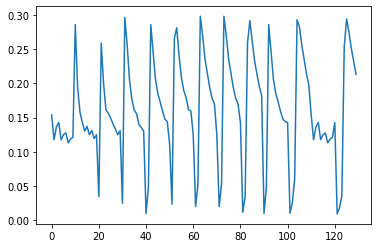

In [96]:
plt.plot(df["ratio"])

In [97]:
len(df["ratio"].unique())

89

In [98]:
# ratio_max=max(df["ratio"])


In [99]:
df[df["ratio"] == df["ratio"].max()]

,d,z,E_cent,E_99,x_99,E_half,x_half,ratio
63,0.136667,0.2,159.357538,157.763962,0.225225,79.678769,0.755756,0.298013
73,0.136667,0.2,159.357538,157.763962,0.225225,79.678769,0.755756,0.298013


In [100]:
ef=df[df["ratio"] == df["ratio"].max()]
max(ef["E_cent"])

159.357537650709